# Canada Population Vs GDP DataFrame

### In This notebook we will import Canada's GDP and Population data from world bank and Visualize it

In [1]:
import os
os.getcwd()

'/home/jovyan'

In [3]:
from pyspark.sql import Row
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pylab as P
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *

spark = SparkSession.builder.master("local").appName("Canada").getOrCreate()

get_ipython().magic('matplotlib inline')
plt.rcdefaults()

In [54]:
static = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/home/jovyan/GDP_EX.csv")

In [55]:
static.show(20)

+----+---------------+-----------------+----------------+--------------+-------------+--------------------+
|YEAR|Male_Population|female_Population|total_Population|GDP_per_capita|          GDP|greenhouse_emissions|
+----+---------------+-----------------+----------------+--------------+-------------+--------------------+
|1990|       13730936|         13960202|        27691138|   20173.93565| 593930000000|         2.869208211|
|1991|       13897766|         14139654|        28037420|   20160.72885| 610328000000|         2.869208211|
|1992|       14057716|         14313548|        28371264|   20557.46336| 592388000000|         1.641016289|
|1993|       14207593|         14477171|        28684764|   21367.20327| 577171000000|         7.706557579|
|1994|       14359707|         14640956|        29000663|   22555.69744| 578139000000|         32.61749838|
|1995|       14506536|         14795775|        29302311|   23401.87468| 604032000000|          37.3494714|
|1996|       14658499|      

In [37]:
static.createOrReplaceTempView("canada")

In [38]:
GDP = spark.sql("SELECT GDP FROM canada")
GDP.describe().show()

+-------+--------------------+
|summary|                 GDP|
+-------+--------------------+
|  count|                  28|
|   mean|1.048804392857142...|
| stddev|5.039798453473327...|
|    min|        155290000000|
|    max|       1842020000000|
+-------+--------------------+



In [39]:
GDPList = GDP.rdd.map(lambda p: p.GDP).collect()

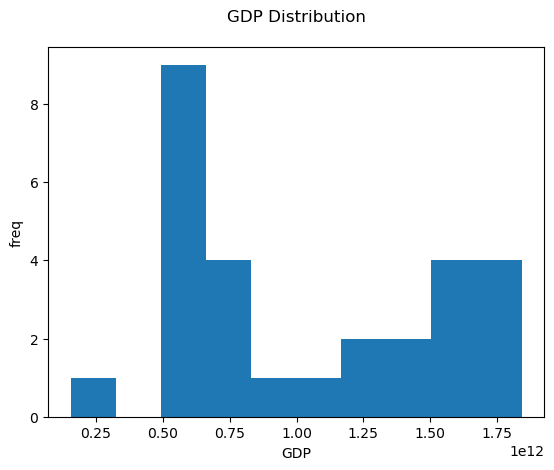

In [40]:
plt.hist(GDPList)
plt.title("GDP Distribution\n")
plt.xlabel("GDP")
plt.ylabel("freq")
plt.show(block=False)

In [41]:
emissions = spark.sql("SELECT greenhouse_emissions FROM canada")

In [42]:
emissions.describe().show()

+-------+--------------------+
|summary|greenhouse_emissions|
+-------+--------------------+
|  count|                  28|
|   mean|   41.10048830857143|
| stddev|  24.658447582579743|
|    min|         1.641016289|
|    max|         85.49612854|
+-------+--------------------+



In [44]:
EList = emissions.rdd.map(lambda p: p.greenhouse_emissions).collect()

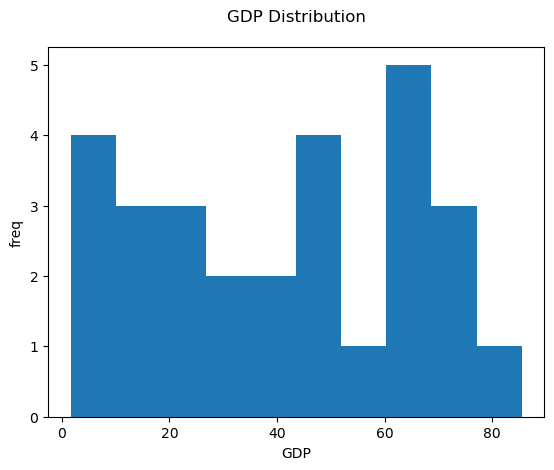

In [46]:
plt.hist(EList)
plt.title("GDP Distribution\n")
plt.xlabel("GDP")
plt.ylabel("freq")
plt.show(block=False)

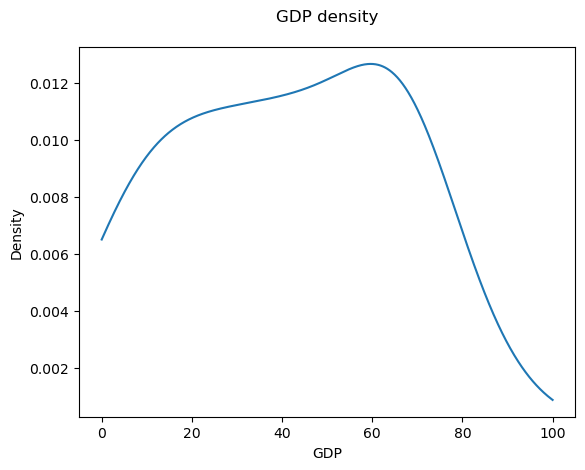

In [45]:
from scipy.stats import gaussian_kde
density = gaussian_kde(EList)
xAxisValues = np.linspace(0,100,1000) # Use the range of ages from 0 to 100 and the number of data points
density.covariance_factor = lambda : .5
density._compute_covariance()
plt.title("GDP density\n")
plt.xlabel("GDP")
plt.ylabel("Density")
plt.plot(xAxisValues, density(xAxisValues))
plt.show(block=False)

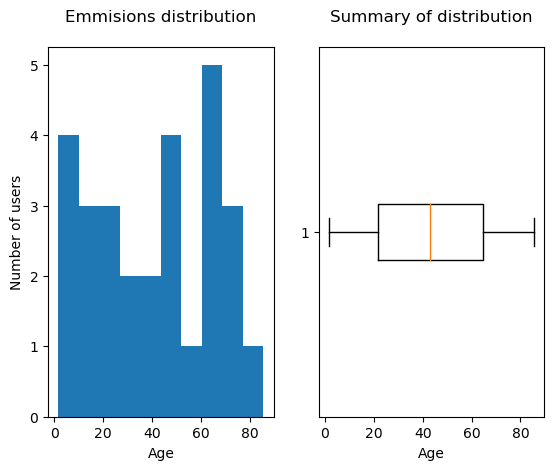

In [47]:
plt.subplot(121)
plt.hist(EList)
plt.title("Emmisions distribution\n")
plt.xlabel("Age")
plt.ylabel("Number of users")
plt.subplot(122)
plt.title("Summary of distribution\n")
plt.xlabel("Age")
plt.boxplot(EList, vert=False)
plt.show(block=False)

In [61]:
Top10 = spark.sql("SELECT Male_population, SUM(GDP_per_capita) as GDP_per_capita FROM canada GROUP BY Male_population LIMIT 10")
Top10.show()

+---------------+--------------+
|Male_population|GDP_per_capita|
+---------------+--------------+
|       16871021|    40012.3914|
|       15369080|   30107.65694|
|       16492292|    40275.9899|
|       17219264|   42189.19611|
|       13897766|   20160.72885|
|       16311491|   39439.80689|
|       14506536|   23401.87468|
|       15056838|   27745.80655|
|       13730936|   20173.93565|
|       15539429|   30853.20132|
+---------------+--------------+



In [65]:
Male = spark.sql('SELECT Male_population FROM canada')
Male.describe().show()

+-------+------------------+
|summary|   Male_population|
+-------+------------------+
|  count|                28|
|   mean|      1.58318145E7|
| stddev|1318509.2723909267|
|    min|          13730936|
|    max|          18123037|
+-------+------------------+



In [66]:
MList = Male.rdd.map(lambda p: p.Male_population).collect()

In [67]:
Female = spark.sql('SELECT female_population FROM canada')
FList = Female.rdd.map(lambda p: p.female_population).collect()

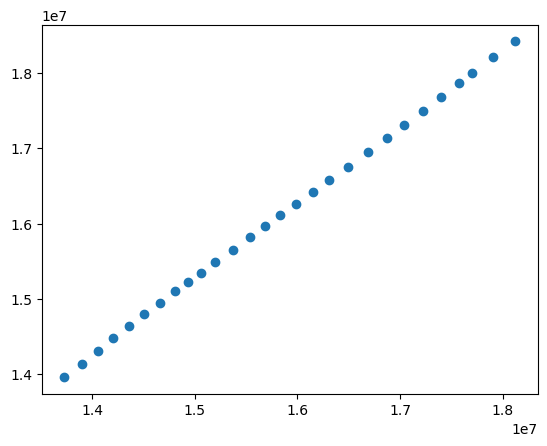

In [68]:
plt.scatter(MList, FList, marker='o');

In [78]:
TS = spark.sql('SELECT YEAR, Male_population, female_population, total_population from canada ORDER BY YEAR')

In [79]:
TS.show(3)

+----+---------------+-----------------+----------------+
|YEAR|Male_population|female_population|total_population|
+----+---------------+-----------------+----------------+
|1990|       13730936|         13960202|        27691138|
|1991|       13897766|         14139654|        28037420|
|1992|       14057716|         14313548|        28371264|
+----+---------------+-----------------+----------------+
only showing top 3 rows



In [80]:
series = TS.toPandas()

Text(0.5, 1.0, 'Time Series Graph')

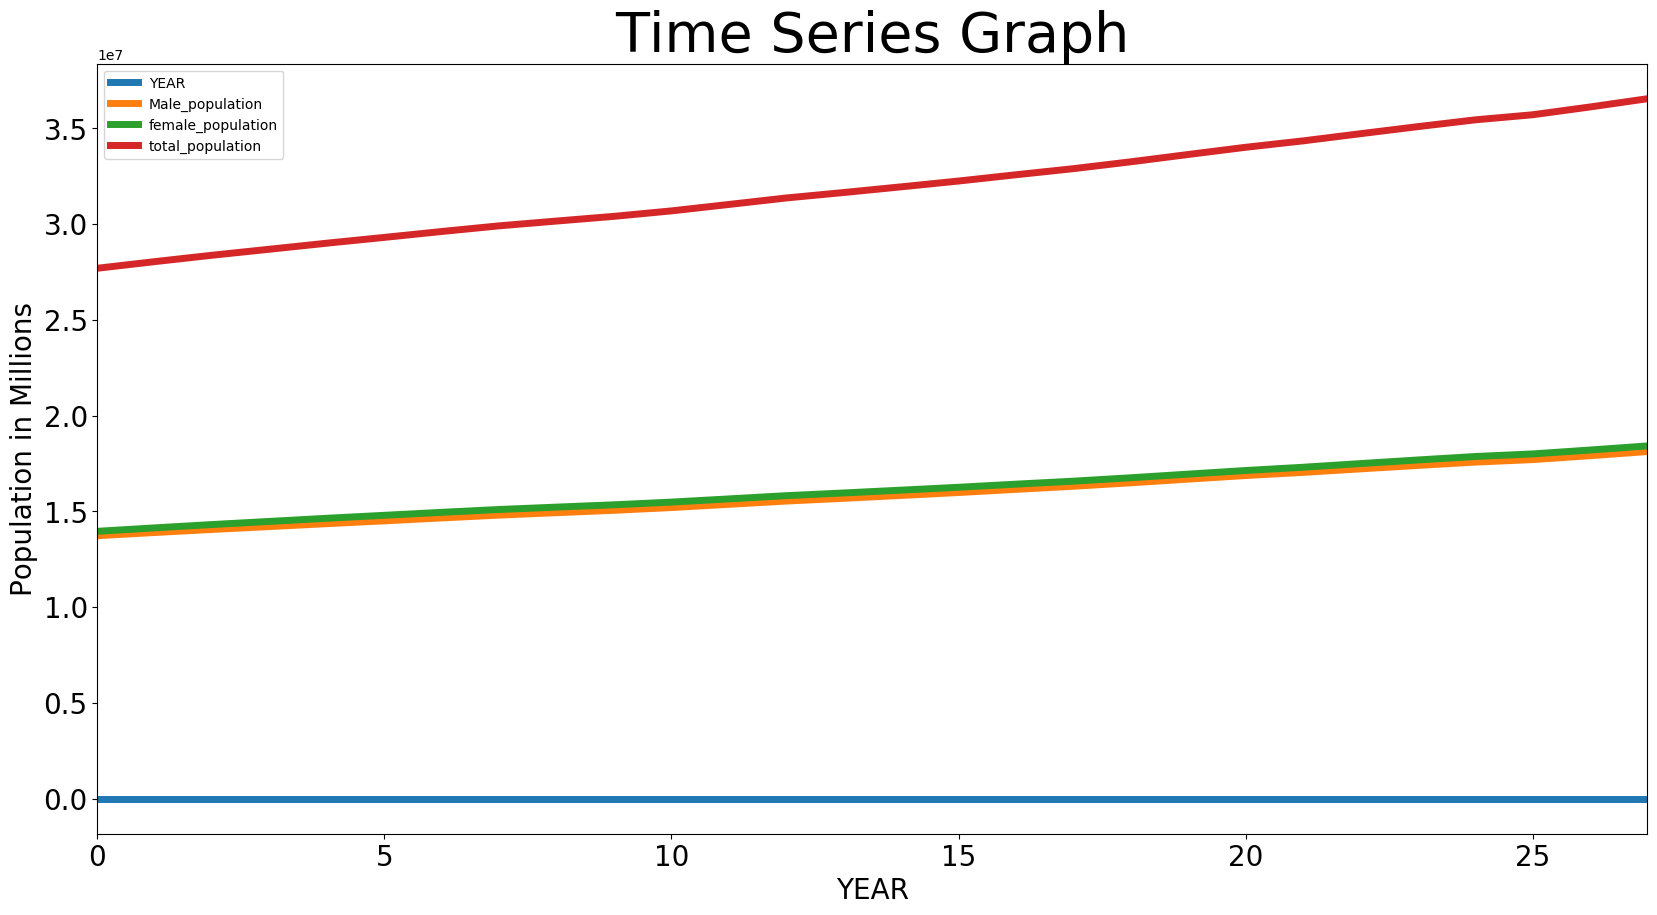

In [85]:
series.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('YEAR', fontsize=20);
plt.ylabel('Population in Millions', fontsize=20)
plt.title('Time Series Graph', fontsize=40)

In [89]:
percapita = spark.sql('SELECT (GDP_per_capita*10000) as percapita from canada ORDER BY YEAR')

In [90]:
percapita.show(3)

+--------------------+
|           percapita|
+--------------------+
|       2.017393565E8|
|       2.016072885E8|
|2.0557463360000002E8|
+--------------------+
only showing top 3 rows



In [92]:
perList = percapita.rdd.map(lambda p: p.percapita).collect()

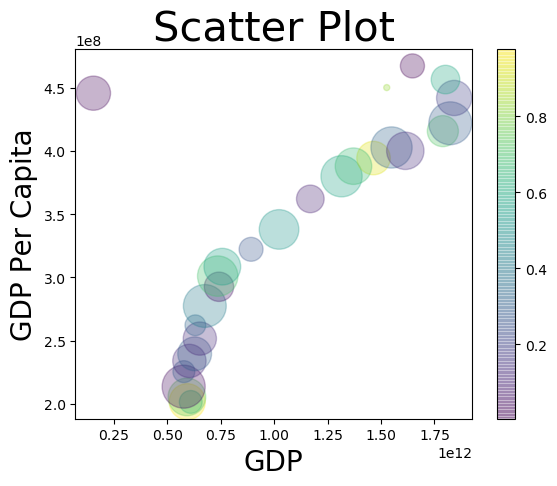

In [100]:
rng = np.random.RandomState(0)
x = rng.randn(28)
y = rng.randn(28)
colors = rng.rand(28)
sizes = 1000 * rng.rand(28)

plt.scatter(GDPList, perList, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.xlabel('GDP', fontsize=20);
plt.ylabel('GDP Per Capita', fontsize=20)
plt.title('Scatter Plot', fontsize=30)
plt.colorbar();